# 0. Install packages

In [5]:
!pip install pandas numpy seaborn matplotlib statsmodels

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 2.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 4.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 4.5 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 4.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 3.6 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 3.9 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


# 2. Load the Free Open Dataset

In [8]:
df = sns.load_dataset("flights")

df['date'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str),
    format='%Y-%b'
)

df = df.sort_values("date").reset_index(drop=True)
df.head()


,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


# 3. Basic Summary and Description

In [9]:
print(df.describe())

monthly_counts = df.groupby("month")["passengers"].mean()
print("\nAverage Passengers per Month:\n", monthly_counts)


              year  passengers                 date
count   144.000000  144.000000                  144
mean   1954.500000  280.298611  1954-12-16 05:00:00
min    1949.000000  104.000000  1949-01-01 00:00:00
25%    1951.750000  180.000000  1951-12-24 06:00:00
50%    1954.500000  265.500000  1954-12-16 12:00:00
75%    1957.250000  360.500000  1957-12-08 18:00:00
max    1960.000000  622.000000  1960-12-01 00:00:00
std       3.464102  119.966317                  NaN

Average Passengers per Month:
 month
Jan    241.750000
Feb    235.000000
Mar    270.166667
Apr    267.083333
May    271.833333
Jun    311.666667
Jul    351.333333
Aug    351.083333
Sep    302.416667
Oct    266.583333
Nov    232.833333
Dec    261.833333
Name: passengers, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5100\1436519277.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby("month")["passengers"].mean()


# 4. Plot Temporal Trend

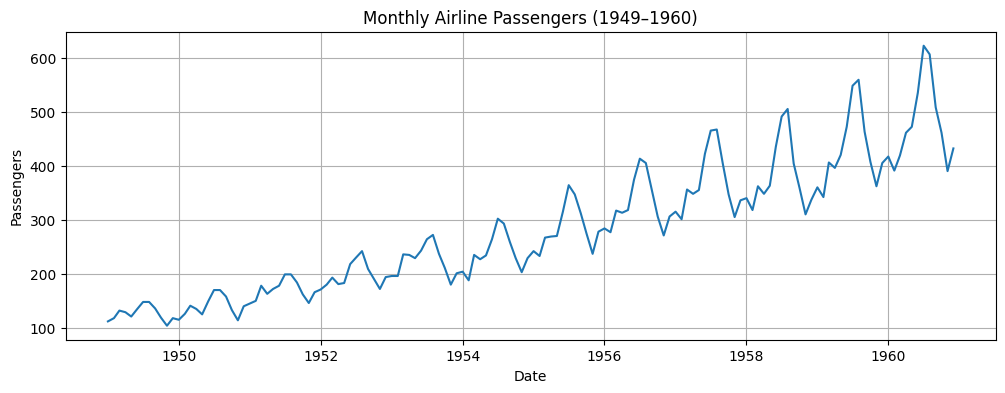

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['passengers'])
plt.title("Monthly Airline Passengers (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()


# 5. Seasonal Decomposition

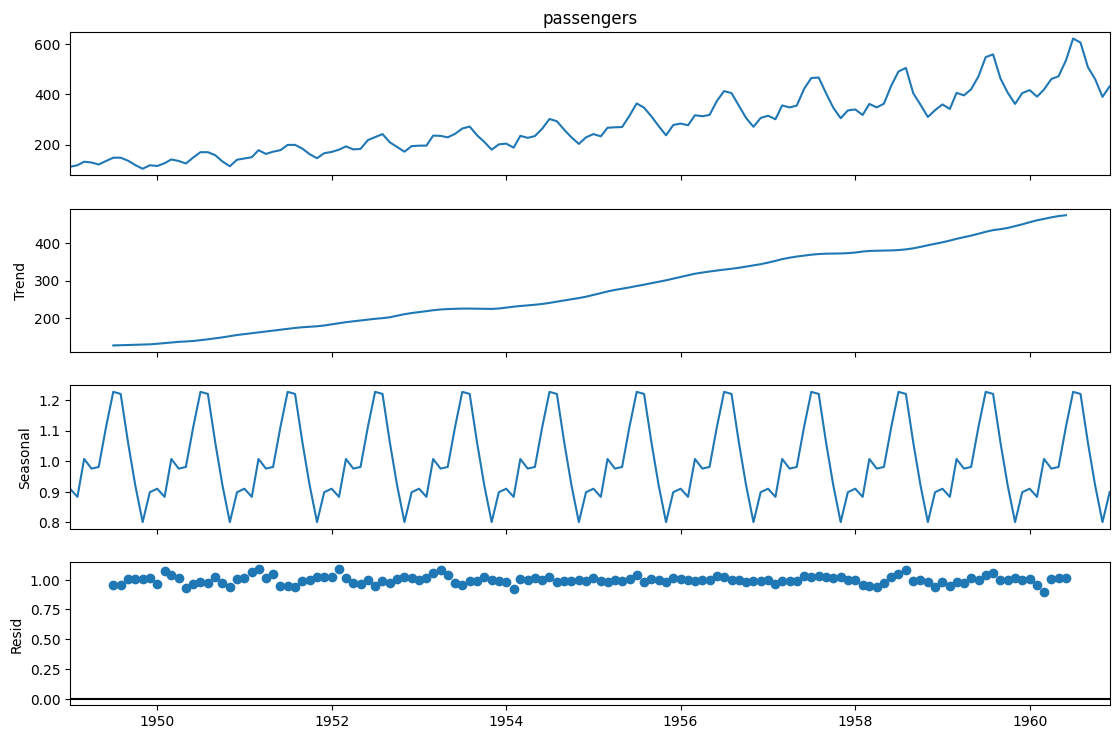

In [11]:
# Set datetime index for decomposition
df_ts = df.set_index("date")["passengers"]

decomp = seasonal_decompose(df_ts, model='multiplicative')

fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()


# 6. Correlation With Time (trend strength)

In [12]:
df['time_index'] = np.arange(len(df))

corr = df['time_index'].corr(df['passengers'])
print("Correlation between time trend and passengers:", corr)


Correlation between time trend and passengers: 0.9239254112768995


# 7. Fit ARIMA Model for Forecasting

In [13]:
model = ARIMA(df_ts, order=(2,1,2))
results = model.fit()

print(results.summary())


c:\Users\LENOVO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 18 Nov 2025   AIC                           1353.347
Time:                        18:57:16   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.798      0.0

c:\Users\LENOVO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 8. Forecast the Next 24 Months

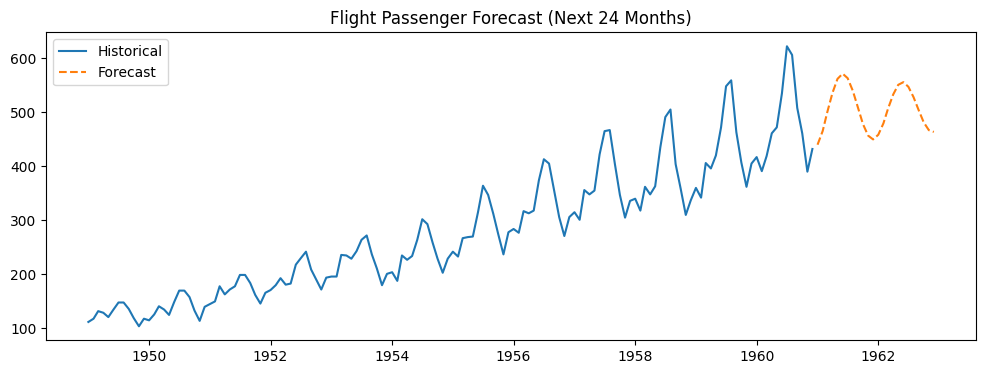

In [14]:
forecast = results.forecast(steps=24)

plt.figure(figsize=(12,4))
plt.plot(df_ts, label="Historical")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Flight Passenger Forecast (Next 24 Months)")
plt.legend()
plt.show()


# 9. Conclusions (Markdown cell)

### Key Insights

- Airline passengers increased strongly from 1949 to 1960.
- Clear yearly seasonality: peaks mid-year, declines at year-end.
- Time correlation is very high, indicating strong upward trend.
- ARIMA model predicts continued growth for the next two years.

This notebook demonstrates a complete workflow for analyzing temporal datasets using a free, publicly available dataset.
